### Car Price Prediction

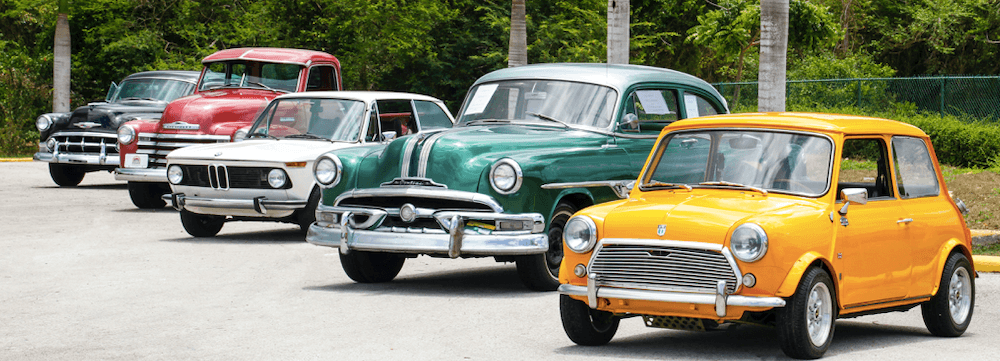

### Load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
df=pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/AI & Deep Learning/Datasets/CarPricesData.pkl')
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


### Data description
The business meaning of each column in the data is as below
- Price: The Price of the car in dollars
- Age: The age of the car in months
- KM: How many KMS did the car was used
- FuelType: Petrol/Diesel/CNG car
- HP: Horse power of the car
- MetColor: Whether car has metallic color or not
- Automatic: Whether car has automatic transmission or not
- CC: The engine size of the car
- Doors: The number of doors in the car
- Weight: The weight of the car

In [5]:
df.shape

(1435, 8)

In [6]:
df.size

11480

In [7]:
df.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [8]:
df.dtypes

Age         float64
KM            int64
Weight      float64
HP            int64
MetColor      int64
CC          float64
Doors         int64
Price         int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB


In [10]:
df.describe(include='all')

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,56.027178,68571.782578,1071.659930,101.491986,0.674564,1566.735192,4.032753,10720.915679
std,18.532943,37491.094553,47.688509,14.981408,0.468701,186.767122,0.952667,3608.732978
min,1.000000,1.000000,1000.000000,69.000000,0.000000,1300.000000,2.000000,4350.000000
25%,44.000000,43000.000000,1040.000000,90.000000,0.000000,1400.000000,3.000000,8450.000000
50%,61.000000,63451.000000,1070.000000,110.000000,1.000000,1600.000000,4.000000,9900.000000
75%,70.000000,87041.500000,1085.000000,110.000000,1.000000,1600.000000,5.000000,11950.000000
max,80.000000,243000.000000,1320.000000,192.000000,1.000000,2000.000000,5.000000,32500.000000


### Missing values

In [11]:
df.isna().sum()

Age         0
KM          0
Weight      0
HP          0
MetColor    0
CC          0
Doors       0
Price       0
dtype: int64

**No missing values.**

### Duplicate row

In [12]:
df.duplicated().sum()

0

**No duplicate row.**

## Artificial Neural Network for regression problem

### Create Target(Dependent) & Features(Independent)

In [44]:
X=df.drop('Price', axis=1).values
y=df['Price'].values.reshape(-1,1)
print(X)

[[2.3000e+01 4.6986e+04 1.1650e+03 ... 1.0000e+00 2.0000e+03 3.0000e+00]
 [2.3000e+01 7.2937e+04 1.1650e+03 ... 1.0000e+00 2.0000e+03 3.0000e+00]
 [2.4000e+01 4.1711e+04 1.1650e+03 ... 1.0000e+00 2.0000e+03 3.0000e+00]
 ...
 [7.1000e+01 1.7016e+04 1.0150e+03 ... 0.0000e+00 1.3000e+03 3.0000e+00]
 [7.0000e+01 1.6916e+04 1.0150e+03 ... 1.0000e+00 1.3000e+03 3.0000e+00]
 [7.6000e+01 1.0000e+00 1.1140e+03 ... 0.0000e+00 1.6000e+03 5.0000e+00]]


In [45]:
print(y)

[[13500]
 [13750]
 [13950]
 ...
 [ 8500]
 [ 7250]
 [ 6950]]


### Standardize the data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()
scaler_x_fit=scaler_x.fit(X)
scaler_y_fit=scaler_y.fit(y)
X=scaler_x_fit.transform(X)
y=scaler_y_fit.transform(y)
X

array([[-1.78270076, -0.57595832,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       [-1.78270076,  0.11647404,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       [-1.72872398, -0.71670745,  1.95796873, ...,  0.69457758,
         2.32062178, -1.08444302],
       ...,
       [ 0.80818476, -1.37562683, -1.18853963, ..., -1.43972398,
        -1.42866784, -1.08444302],
       [ 0.75420798, -1.37829506, -1.18853963, ...,  0.69457758,
        -1.42866784, -1.08444302],
       [ 1.07806867, -1.82962616,  0.88815589, ..., -1.43972398,
         0.17817057,  1.01565918]])

In [35]:
y

array([[ 0.77036821],
       [ 0.83966875],
       [ 0.89510918],
       ...,
       [-0.61564265],
       [-0.96214536],
       [-1.04530601]])

### Split data into train and test

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


### Importing required libraries & packages

In [37]:
import tensorflow
import keras
from keras.layers import Dense
from keras.models import Sequential

### Creating Deep Learning- Artificial Neural Networks(ANN) model
The architecture of a Deep Learning ANN used in this case study is shown below
- I am using two hidden layers with five neurons each and one output layer with one neuron.
- Finally, choose the combination that produces the best possible accuracy. This is the process of tuning the ANN model.
- The “Sequential” module from the Keras library is used to create a sequence of ANN layers stacked one after the other. Each layer is defined using the “Dense” module of Keras where we specify how many neurons would be there, which technique would be used to initialize the weights in the network. what will be the activation function for each neuron in that layer etc.

### Hyperparameters in ANN
The hyperparameters are, 
- **units=5**: This means we are creating a layer with five neurons in it. Each of these five neurons will be receiving the values of inputs, for example, the values of ‘Age’ will be passed to all five neurons, similarly all other columns.
- **input_dim=7**: This means there are seven predictors(Independent or input variables) in the input data which is expected by the first layer. If you see the second dense layer, we don’t specify this value, because the Sequential model passes this information further to the next layers.
- **kernel_initializer=’normal’**: When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like **‘normal’ or ‘glorot_uniform’**.
- **activation=’relu’**: This specifies the activation function for the calculations inside each neuron. You can choose values like **‘relu’, ‘tanh’, ‘sigmoid’**, etc.
- **batch_size=20**: This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors.When all the rows are passed in the batches of 20 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. This is also known as mini-batch gradient descent. A small value of batch_size will make the ANN look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the ANN look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.
- **Epochs=50**: The same activity of adjusting weights continues for 50 times, as specified by this parameter. In simple terms, the ANN looks at the full training data 50 times and adjusts its weights.

### Create ANN model

In [38]:
#create ANN model
model=Sequential()

#Input layer or first hidden layer
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu',))

#Second hidden layer
model.add(Dense(units=5, kernel_initializer='normal',activation='tanh'))

#Output layer
model.add(Dense(units=1, kernel_initializer='normal'))

#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

#SUmmary of the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 40        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Fitting the model
model.fit(x_train,y_train, batch_size=20, epochs=50)

Epoch 1/50
51/51 [==============================] - 1s 3ms/step - loss: 0.9820
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.9319
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.7310
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.4780
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.3242
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.2511
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.2162
Epoch 8/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1940
Epoch 9/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1805
Epoch 10/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1710
Epoch 11/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1643
Epoch 12/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1598
Epoch 13/50
51/51 [==============================

### Hyperparameter tunning to find best suited values
- Finding the best values for batch_size and epoch is very important as it directly affects the model performance. Bad values can lead to overfitting or underfitting. I am showing two approaches for tuning the parameters of the ANN. Apart from epoch and batch_size, you can also choose to tune the optimal number of neurons, the optimal number of layers, etc.
- There is no thumb rule which can help you to decide the number of layers/number of neurons etc. in the first look at data. You need to try different parameters and choose the combination which produces the highest accuracy.
- Just keep in mind, that, the bigger the network, the more computationally intensive it is, hence it will take more time to run. So always to find the best accuracy with the minimum number of layers/neurons.

### Finding best set of parameters
- This is a simple for loop based approach. You can easily edit this and adapt it for more hyperparameters by simply adding another nested for-loop.

In [67]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(x_train, y_train, x_test, y_test):
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    # store the results indataframe
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'MSE']) 
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            model.add(Dense(units=5, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
            model.add(Dense(units=1, kernel_initializer='normal'))
            model.compile(loss='mean_squared_error', optimizer='adam')
            model.fit(x_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            from sklearn.metrics import mean_squared_error as mse
            MSE=mse(y_test, model.predict(x_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'MSE:', MSE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), MSE]],
                                                                    columns=['TrialNumber', 'Parameters', 'MSE'] ))
    return(SearchResultsData)
 
 
# Calling the function
ResultsData=FunctionFindBestParams(x_train, y_train, x_test, y_test)

14/14 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 MSE: 0.13521999978028806
14/14 [==============================] - 0s 2ms/step
2 Parameters: batch_size: 5 - epochs: 10 MSE: 0.38862480279801265
14/14 [==============================] - 0s 5ms/step
3 Parameters: batch_size: 5 - epochs: 50 MSE: 0.11848015049768816
14/14 [==============================] - 0s 2ms/step
4 Parameters: batch_size: 5 - epochs: 100 MSE: 0.11706669921494922
14/14 [==============================] - 0s 2ms/step
5 Parameters: batch_size: 10 - epochs: 5 MSE: 0.16340890474675066
14/14 [==============================] - 0s 2ms/step
6 Parameters: batch_size: 10 - epochs: 10 MSE: 0.1321543643942062
14/14 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 MSE: 0.1115236665115437
14/14 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 MSE: 0.11708657961538219
14/14 [==============================] - 0s 2m

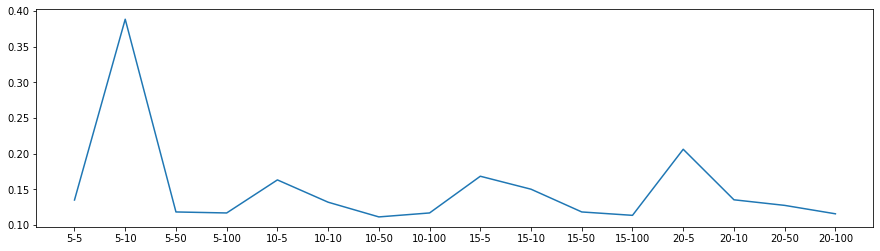

In [68]:
plt.figure(figsize=(15,4))
ResultsData.set_index('Parameters', inplace=True)
plt.plot(ResultsData['MSE']);

#### Mean Squared Error is low when batch_size=10 & epochs=50..
#### Train the model using these parameters

In [69]:
model.fit(x_train,y_train, batch_size=20, epochs=50)

Epoch 1/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1130
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1098
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 4/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1103
Epoch 5/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1097
Epoch 6/50
51/51 [==============================] - 0s 3ms/step - loss: 0.1089
Epoch 7/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1091
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 9/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1083
Epoch 11/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1086
Epoch 12/50
51/51 [==============================] - 0s 2ms/step - loss: 0.1075
Epoch 13/50
51/51 [==============================

### Predict for test data and find the error

In [70]:
# Generating Predictions on testing data
Predictions=model.predict(x_test)
# Scaling the predicted Price data back to original price scale
Predictions=scaler_y_fit.inverse_transform(Predictions)
 
# Scaling the y_test Price data back to original price scale
y_test_orig=scaler_y_fit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data=scaler_x_fit.inverse_transform(x_test)
 
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 [==============================] - 0s 3ms/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9994.689453
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,9723.414062
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8849.956055
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9445.507812
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8907.877930


### Finding the accuracy of the model
**The accuracy is calculated as 100-MAPE.**

In [76]:
from sklearn.metrics import mean_absolute_percentage_error as mape

MAPE=mape(TestingData['PredictedPrice'], TestingData['Price'])

print("Accuracy of the model is : ", 100-MAPE)

Accuracy of the model is :  99.91262500032114


### Predict the Price of your Own Car

In [78]:
dd=pd.DataFrame({'age':[15], 'KM':[10000], 'Weight':[1100], 'HP':[100], 'MetColor':[1], 'CC':[2000], 'Doors':[5]})
dd

,age,KM,Weight,HP,MetColor,CC,Doors
0,15,10000,1100,100,1,2000,5


In [79]:
#standardize the values
sample=dd.values
sample=scaler_x_fit.transform(sample)
price=model.predict(sample)
price=scaler_y_fit.inverse_transform(price)
print("Price of the Care is ", price)

1/1 [==============================] - 0s 107ms/step
Price of the Care is  [[16162.65]]


### Conclusion:
- Created ANN model to predict Car Price and the Accuracy my model recieved is 99.91%.